In [34]:
import random
import numpy as np
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding as LLE

from ripser import ripser
from persim import plot_diagrams

import plotly.graph_objects as go

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = np.loadtxt('data/pentagonsamplesSmall2.txt', delimiter=',')
data

array([[ 1.        ,  0.        ,  2.        ,  0.        ,  1.5       ,
        -0.8660254 ],
       [ 1.        ,  0.        ,  2.        ,  0.        ,  1.5       ,
         0.8660254 ],
       [ 1.        ,  0.        ,  1.99802673,  0.06279052,  1.55339155,
        -0.83292124],
       ...,
       [ 0.5       , -0.8660254 ,  0.5       , -0.8660254 ,  1.48228725,
        -1.05340672],
       [ 0.5       , -0.8660254 ,  0.5       , -0.8660254 ,  1.4921147 ,
        -0.99135864],
       [ 0.5       , -0.8660254 ,  0.5       , -0.8660254 ,  1.49802673,
        -0.92881592]])

In [36]:
data.shape

(14074, 6)

In [37]:
data_aug = np.zeros((data.shape[0], 10))
data_aug

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
data_aug.shape

(14074, 10)

In [39]:
data_aug[:,2] = 1 
data_aug

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [40]:
data_aug[:,[8,9,4,5,6,7]] = data
data_aug

array([[ 0.        ,  0.        ,  1.        , ..., -0.8660254 ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.8660254 ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.83292124,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.05340672,
         0.5       , -0.8660254 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.99135864,
         0.5       , -0.8660254 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.92881592,
         0.5       , -0.8660254 ]])

In [41]:
angle_data = np.zeros((data.shape[0],5)) # internal angles
angle_data

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [43]:
for i in range(5):
    ii = (2*i -2)%10
    jj = (2*i - 1)%10
    u = data_aug[:, [ii, jj]]
    
    ii = (2*i)%10
    jj = (2*i + 1)%10
    v = data_aug[:, [ii , jj]]
    
    ii = (2*i + 2)%10
    jj = (2*i + 3)%10
    w = data_aug[:, [ii, jj]]
    
    z = np.sum((u - v)*(w-v), axis = 1)
    
    angle_data[:,i]  = np.arccos( np.minimum(z,1) )

In [44]:
# let i = 1
ii = 0
jj = 1
u = data_aug[:, [ii,jj]]
u
ii = 2 
jj = 3
v = data_aug[:, [ii,jj]]
v
ii = 4
jj = 7 
w = data_aug[:, [ii,jj]]
w
z = np.sum((u - v)*(w-v), axis = 1)
z

array([-1.        , -1.        , -0.99802673, ...,  0.5       ,
        0.5       ,  0.5       ])

In [45]:
data_aug[0]

array([ 0.       ,  0.       ,  1.       ,  0.       ,  2.       ,
        0.       ,  1.5      , -0.8660254,  1.       ,  0.       ])

In [ ]:
# i think they choose C since its like R2 and need two coordinates for each point in pentagon 
# i think it should just be p0,...,p4. i think this was a typo 
# need 10 columns because there are 5 points in C2

## trying quadrilateral 

In [ ]:
# set first coordinate to (0,0) and second to (0,1)
# generate random sample of points (x,y) in R2 such that d((0,0), (x,y)) = 1, i.e. sample points from the unit circle
# based on those points (x,y), add vector (1,0) to get 4th point 
# for each (x,y), also define 4th point as (0,0) to get overlapping edges 

In [99]:
from numpy import pi,cos,sin
n_samples = 100
Z = np.random.random(n_samples)
phi = 2*pi*Z
X = cos(phi)
Y = sin(phi)

In [100]:
(X*X + Y*Y)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
U = X + 1
V = Y 
U2 = X * 0
V2 = Y * 0

In [102]:
X = list(X) 
Y = list(Y)
U = list(U)
V = list(V)
U2 = list(U2)
V2 = list(V2)

In [103]:
X.extend(X) 
Y.extend(Y)
U.extend(U2)
V.extend(V2)

In [104]:
print(len(X), len(Y), len(U), len(V))

200 200 200 200


In [111]:
data_aug = np.zeros((200, 8))
data_aug[:,2] = 1 
data_aug[:,4] = X
data_aug[:,5] = Y
data_aug[:,6] = U
data_aug[:,7] = V

In [112]:
data_aug.shape

(200, 8)

In [113]:
data_aug

array([[ 0.        ,  0.        ,  1.        , ...,  0.29816438,
         0.04548546,  0.29816438],
       [ 0.        ,  0.        ,  1.        , ...,  0.83961845,
         0.45682336,  0.83961845],
       [ 0.        ,  0.        ,  1.        , ..., -0.3231221 ,
         1.94635728, -0.3231221 ],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.1503224 ,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  1.        , ..., -0.97325117,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.35281562,
         0.        ,  0.        ]])

In [118]:
data = data_aug[:,3:7]

In [119]:
data

array([[ 0.00000000e+00, -9.54514538e-01,  2.98164380e-01,
         4.54854625e-02],
       [ 0.00000000e+00, -5.43176639e-01,  8.39618449e-01,
         4.56823361e-01],
       [ 0.00000000e+00,  9.46357283e-01, -3.23122103e-01,
         1.94635728e+00],
       [ 0.00000000e+00,  9.01263344e-01, -4.33271721e-01,
         1.90126334e+00],
       [ 0.00000000e+00, -8.38810997e-01, -5.44422732e-01,
         1.61189003e-01],
       [ 0.00000000e+00, -6.75683975e-01, -7.37191404e-01,
         3.24316025e-01],
       [ 0.00000000e+00,  1.40802692e-01,  9.90037677e-01,
         1.14080269e+00],
       [ 0.00000000e+00, -8.39627465e-01,  5.43162701e-01,
         1.60372535e-01],
       [ 0.00000000e+00, -2.40714414e-02, -9.99710241e-01,
         9.75928559e-01],
       [ 0.00000000e+00, -2.41002519e-01,  9.70524490e-01,
         7.58997481e-01],
       [ 0.00000000e+00,  3.41705214e-03,  9.99994162e-01,
         1.00341705e+00],
       [ 0.00000000e+00, -6.89256243e-01,  7.24517655e-01,
      

In [123]:
#PCA
pca = PCA(n_components=4)
data_pca = pca.fit(data).transform(data)

print('Explained Vairance', pca.explained_variance_ratio_)

fig = go.Figure(data=[go.Scatter3d(
    x=data_pca[:,0], y=data_pca[:,1], z=data_pca[:,2], 
    mode ='markers', 
)])

fig.update_layout(autosize=False, width=700, height=700)

fig.show()

Explained Vairance [0.48231264 0.35523616 0.1624512  0.        ]


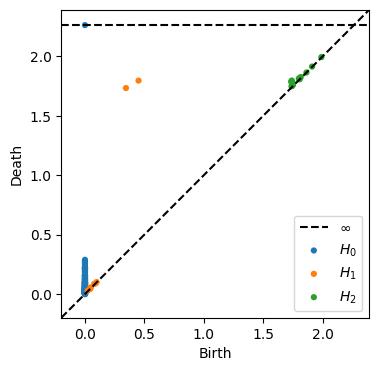

In [124]:
res = ripser(data, maxdim=2)
dgms = res['dgms']
plt.figure(figsize = (4,4)) 
plot_diagrams(dgms)